# iAR package Demo

In [1]:
import iar
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
print("iAR version:")
print(iar.__version__)

iAR version:
1.2.8


# Simulates from an IAR Model

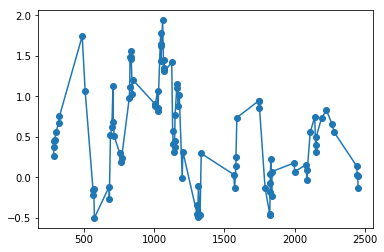

In [2]:
from iar import IARsample,gentime
np.random.seed(6713)
sT=gentime(n=100)
y,sT =IARsample(0.99,100,sT)

plt.plot(sT,y,"o-")
plt.show()

# Maximum Likelihood Estimation of the IAR Model

In [3]:
from iar import IARphiloglik,IARloglik
phi=IARloglik(y,sT,0)
print("Estimated parameter:",np.round(phi,4))

Estimated parameter: 0.9907


# Simulates from an IAR Gamma Model

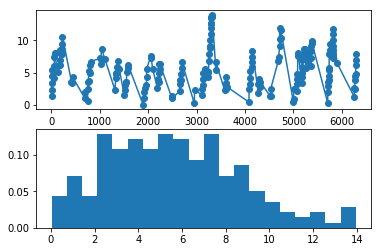

In [4]:
from iar import IARgsample
np.random.seed(12917)
sT=gentime(n=200)
y,sT =IARgsample(0.99,200,sT,sigma2=3,mu=1)

plt.subplot(2,1,1)
plt.plot(sT,y,"o-")
plt.subplot(2,1,2)
plt.hist(y,bins=20,density=1)
plt.show()


# Maximum Likelihood Estimation of the IAR-Gamma Model

In [5]:
from iar import IARgamma
phi,mu,sigma,loglik=IARgamma(y,sT)
print("Estimated parameter:",np.round(phi,4))
print("Estimated mean:",np.round(mu,4))
print("Estimated standard deviation:",np.round(sigma,4))

Estimated parameter: 0.9908
Estimated mean: 0.9779
Estimated standard deviation: 2.888


/Users/felo/anaconda3/lib/python3.7/site-packages/iar/IARModel.py:151: RuntimeWarning: invalid value encountered in power
  phi=x**d


# Simulates from an IAR T Model

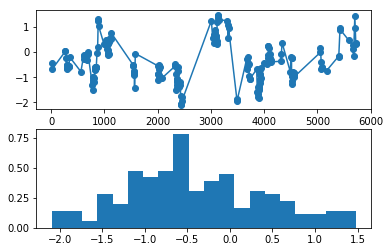

In [6]:
from iar import IARtsample
np.random.seed(6713)
sT=gentime(n=200)
y,sT =IARtsample(0.99,200,sT,sigma2=1,nu=3)

plt.subplot(2,1,1)
plt.plot(sT,y,"o-")
plt.subplot(2,1,2)
plt.hist(y,bins=20,density=1)
plt.show()

# Maximum Likelihood Estimation of the IAR-Gamma Model

In [7]:
from iar import IARt
phi,sigma,loglik=IARt(y,sT,nu=3)
print("Estimated parameter:",np.round(phi,4))
print("Estimated standard deviation:",np.round(sigma,4))

Estimated parameter: 0.9909
Estimated standard deviation: 1.1252


# Test for the significance of the autocorrelation estimated by the IAR model in periodic irregularly observed time series

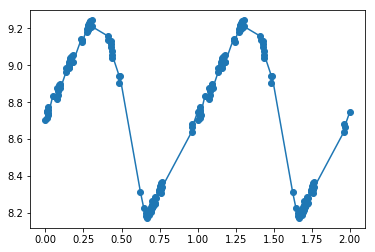

In [8]:
from iar import data_iar,foldlc
import pandas as pd
data=data_iar.clcep()
t=data["t"]
m=data["m"]
merr=data["merr"]
f1=0.060033386
folded_data=foldlc(t,m,merr,f1)

In [9]:
from iar import harmonicfit
res,sT=harmonicfit(t,m,f1)
#Standarized Data
y=res/np.sqrt(np.var(res,ddof=1)) 
phi=IARloglik(y,sT,0,True)
print(phi)
#Unstandardized Data
#phi=IAR_loglik(res,sT,0,False) 

6.677184064819095e-05


6.677184064819095e-05
[-0.18086971  0.06687312]
-9.614229113480436
0.0


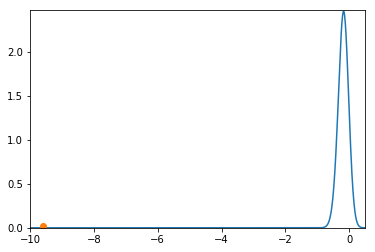

In [10]:
from iar import IARtest
phi,norm,z0,pvalue=IARtest(m,sT,f1,phi,plot=True,xlim=(-10,0.5))
print(phi)
print(norm)
print(z0)
print(pvalue)

# Interpolation using iAR model

/Users/felo/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:517: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


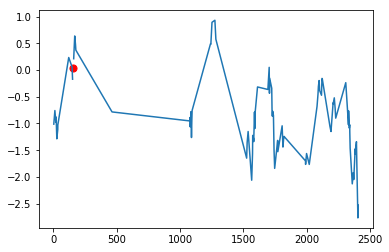

In [11]:
from iar import IARinterpolation
np.random.seed(129)
sT=gentime(n=100,distribution="expmixture")
y,sT =IARsample(0.99,100,sT)
phi=IARloglik(y,sT,0)
phi
napos=10
y0=y
y[napos]=np.nan
xest=phi
yest,ll=IARinterpolation(xest,y=y,st=sT)
yest
plt.plot(sT, y0)
plt.scatter(sT[napos], yest,color="red",s=50)
plt.show()